# Vanishing Gradients 

This is a test for different architectures with different numbers of layers to see which architectures can cope with deep networks, i.e. a high number of layers. For each architecture a specific setting is run 10 times with averaging over the per epoch train and test accuracy. The maximum training and test accuracy per training is plotted over the number of layers as a result. Each run consists of training the net for 100 epochs.

## The test problem

A classification problem with two classes and 600 samples is generated. These samples are divided into a training set with 480 samples and a test set with 120 samples.

In [5]:
import torch
from Dataset.Dataset import makeMoonsDataset

dataset_size = 600
batch_size = 40
test_set_size = dataset_size * 0.2

train_loader, test_loader = makeMoonsDataset(dataset_size, batch_size)

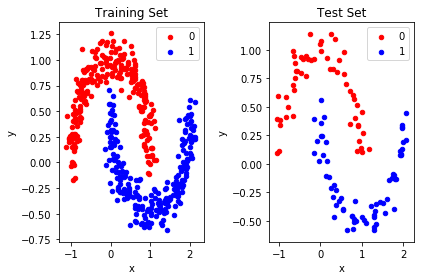

In [6]:
from matplotlib import pyplot as plt
from pandas import DataFrame

x1 = []
x2 = []
y = []
for (data,label) in train_loader:
    res = label#torch.argmax(net.forward, dim=1)
    for point in range(len(data)):
        x1.append(data[point][0].item())
        x2.append(data[point][1].item())
        y.append(res[point].item())
#print(x1)
df = DataFrame(dict(x=x1, y=x2, label=y))
colors = {0:'red', 1:'blue'}
fig, (ax1,ax2) = plt.subplots(1,2)
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax1, kind='scatter', x='x', y='y', label=key, color=colors[key])
ax1.set_title('Training Set')
    
x1 = []
x2 = []
y = []
for (data,label) in test_loader:
    res = label#torch.argmax(label, dim=1)
    for point in range(len(data)):
        x1.append(data[point][0].item())
        x2.append(data[point][1].item())
        y.append(res[point].item())
#print(x1)
df = DataFrame(dict(x=x1, y=x2, label=y))
colors = {0:'red', 1:'blue'}
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax2, kind='scatter', x='x', y='y', label=key, color=colors[key])
ax2.set_title('Test Set')
plt.tight_layout()
plt.show()

In [7]:
# helper functions

def make_uniform_layer_list(layers, num_features):
    return [num_features] * (layers+1)
    
def make_uniform_hidden_layer_list(layers, num_features, num_classes, size_hidden):
    res = [num_features]
    res.extend([size_hidden]*(layers-1))
    res.extend([num_classes])
    return res


## Simple FCNet

### 8 neurons in the hidden layers

In [6]:
from Networks.ResNet import FCNet
import numpy as np

num_epochs = 100
num_features = 2
num_classes = 2
size_hidden = 8
max_layers = 10
train_results_per_layer = np.zeros(max_layers)
test_results_per_layer = np.zeros(max_layers)
basic_save_key = 'Vanishing_gradients_results//FCNet//FCNet'

for num_hidden_layers in range(1,max_layers+1):
    
    num_layers = num_hidden_layers + 1
    print('Number of layers: '+str(num_layers))
    layers = make_uniform_hidden_layer_list(num_layers, num_features, num_classes, size_hidden)
    train_results_per_epoch = np.zeros(num_epochs)
    test_results_per_epoch = np.zeros(num_epochs)
    for i in range(10):
        net = FCNet(num_layers=num_layers, layers=layers, bias=True)
        net.set_test_tracking(True)
        net.train(num_epochs, train_loader, test_loader, print_output=False)
        train_results_per_epoch += net.avg_correct_pred.numpy()
        test_results_per_epoch += net.test_results.numpy()
        
    train_results_per_epoch = train_results_per_epoch / 10
    test_results_per_epoch = test_results_per_epoch / 10
    train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_hidden_size_'+str(size_hidden)+'.csv'
    test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_hidden_size_'+str(size_hidden)+'.csv'
    
    np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
    np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')
    
    train_results_per_layer[num_hidden_layers-1] = train_results_per_epoch.max()
    print('Max training accuracy: '+str(train_results_per_epoch.max()))
    test_results_per_layer[num_hidden_layers-1] = test_results_per_epoch.max()
    print('Max test accuracy: '+str(test_results_per_epoch.max()/test_set_size))

train_save_key = basic_save_key+'_train_per_layer_hidden_size_'+str(size_hidden)+'.csv'
test_save_key = basic_save_key+'_test_per_layer_hidden_size_'+str(size_hidden)+'.csv'
np.savetxt(train_save_key, train_results_per_layer, delimiter=',')
np.savetxt(test_save_key, test_results_per_layer, delimiter=',')

Number of layers: 2
Max training accuracy: 0.915416669845581
Max test accuracy: 0.9525
Number of layers: 3
Max training accuracy: 0.9741666555404663
Max test accuracy: 0.9883333333333333
Number of layers: 4
Max training accuracy: 0.9993749976158142
Max test accuracy: 1.0
Number of layers: 5
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 6
Max training accuracy: 0.9993749916553497
Max test accuracy: 1.0
Number of layers: 7
Max training accuracy: 0.9025000035762787
Max test accuracy: 0.8883333333333333
Number of layers: 8
Max training accuracy: 0.8306250095367431
Max test accuracy: 0.8175
Number of layers: 9
Max training accuracy: 0.6845833480358123
Max test accuracy: 0.6516666666666667
Number of layers: 10
Max training accuracy: 0.5166666805744171
Max test accuracy: 0.4766666666666667
Number of layers: 11
Max training accuracy: 0.5145833492279053
Max test accuracy: 0.48833333333333334


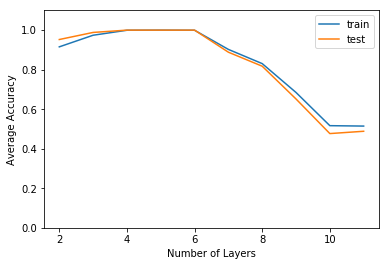

In [32]:
fig, ax = plt.subplots()
layers = np.arange(2,max_layers+2,1)
ax.plot(layers, train_results_per_layer, label='train')
ax.plot(layers, test_results_per_layer/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

### 64 neurons in the hidden layers

In [12]:
from Networks.ResNet import FCNet
import numpy as np

num_epochs = 100
num_features = 2
num_classes = 2
size_hidden = 64
max_layers = 15
train_results_per_layer = np.zeros(max_layers)
test_results_per_layer = np.zeros(max_layers)
basic_save_key = 'Vanishing_gradients_results//FCNet//FCNet'

for num_hidden_layers in range(1,max_layers+1):
    
    num_layers = num_hidden_layers + 1
    print('Number of layers: '+str(num_layers))
    layers = make_uniform_hidden_layer_list(num_layers, num_features, num_classes, size_hidden)
    train_results_per_epoch = np.zeros(num_epochs)
    test_results_per_epoch = np.zeros(num_epochs)
    for i in range(10):
        net = FCNet(num_layers=num_layers, layers=layers, bias=True)
        net.set_test_tracking(True)
        net.train(num_epochs, train_loader, test_loader, print_output=False)
        train_results_per_epoch += net.avg_correct_pred.numpy()
        test_results_per_epoch += net.test_results.numpy()
        
    train_results_per_epoch = train_results_per_epoch / 10
    test_results_per_epoch = test_results_per_epoch / 10
    train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_hidden_size_'+str(size_hidden)+'.csv'
    test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_hidden_size_'+str(size_hidden)+'.csv'
    
    np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
    np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')
    
    train_results_per_layer[num_hidden_layers-1] = train_results_per_epoch.max()
    print('Max training accuracy: '+str(train_results_per_epoch.max()))
    test_results_per_layer[num_hidden_layers-1] = test_results_per_epoch.max()
    print('Max test accuracy: '+str(test_results_per_epoch.max()/test_set_size))

train_save_key = basic_save_key+'_train_per_layer_hidden_size_'+str(size_hidden)+'.csv'
test_save_key = basic_save_key+'_test_per_layer_hidden_size_'+str(size_hidden)+'.csv'
np.savetxt(train_save_key, train_results_per_layer, delimiter=',')
np.savetxt(test_save_key, test_results_per_layer, delimiter=',')

Number of layers: 2
Max training accuracy: 0.9941666483879089
Max test accuracy: 0.9916666666666667
Number of layers: 3
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 4
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 5
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 6
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 7
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 8
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 9
Max training accuracy: 0.9995833337306976
Max test accuracy: 1.0
Number of layers: 10
Max training accuracy: 0.7425000011920929
Max test accuracy: 0.77
Number of layers: 11
Max training accuracy: 0.4979166805744171
Max test accuracy: 0.5258333333333334
Number of layers: 12
Max training accuracy: 0.4966666758060455
Max test accuracy: 0.5283333333333333
Number of layers: 13
Max training accuracy: 0.49458334147930144
Max test accuracy: 0.5158333333333334
Numb

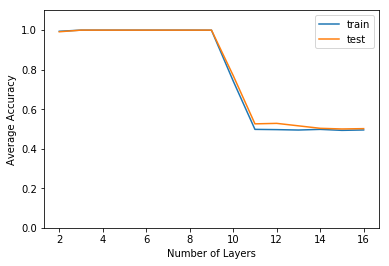

In [13]:
fig, ax = plt.subplots()
layers = np.arange(2,max_layers+2,1)
ax.plot(layers, train_results_per_layer, label='train')
ax.plot(layers, test_results_per_layer/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

## ResNet

### 8 neurons in the hidden layers

In [35]:
from Networks.ResNet import ResFCNet
import numpy as np

num_epochs = 100
num_features = 2
num_classes = 2
size_hidden = 8
max_layers = 25
train_results_per_layer = np.zeros(max_layers)
test_results_per_layer = np.zeros(max_layers)
basic_save_key = 'Vanishing_gradients_results//ResNet//ResNet'

for num_hidden_layers in range(1,max_layers+1):
    
    num_layers = num_hidden_layers + 1
    print('Number of layers: '+str(num_layers))
    layers = make_uniform_hidden_layer_list(num_layers, num_features, num_classes, size_hidden)
    train_results_per_epoch = np.zeros(num_epochs)
    test_results_per_epoch = np.zeros(num_epochs)
    for i in range(10):
        net = ResFCNet(num_layers=num_layers, layers=layers, bias=True)
        net.set_test_tracking(True)
        net.train(num_epochs, train_loader, test_loader, print_output=False)
        train_results_per_epoch += net.avg_correct_pred.numpy()
        test_results_per_epoch += net.test_results.numpy()
        
    train_results_per_epoch = train_results_per_epoch / 10
    test_results_per_epoch = test_results_per_epoch / 10
    train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_hidden_size_'+str(size_hidden)+'.csv'
    test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_hidden_size_'+str(size_hidden)+'.csv'
    
    np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
    np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')
    
    train_results_per_layer[num_hidden_layers-1] = train_results_per_epoch.max()
    print('Max training accuracy: '+str(train_results_per_epoch.max()))
    test_results_per_layer[num_hidden_layers-1] = test_results_per_epoch.max()
    print('Max test accuracy: '+str(test_results_per_epoch.max()/test_set_size))

train_save_key = basic_save_key+'_train_per_layer_hidden_size_'+str(size_hidden)+'.csv'
test_save_key = basic_save_key+'_test_per_layer_hidden_size_'+str(size_hidden)+'.csv'
np.savetxt(train_save_key, train_results_per_layer, delimiter=',')
np.savetxt(test_save_key, test_results_per_layer, delimiter=',')

Number of layers: 2
Max training accuracy: 0.9502083361148834
Max test accuracy: 0.9783333333333334
Number of layers: 3
Max training accuracy: 0.9856249928474426
Max test accuracy: 0.9958333333333333
Number of layers: 4
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 5
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 6
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 7
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 8
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 9
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 10
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 11
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 12
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 13
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 14
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 15
Max 

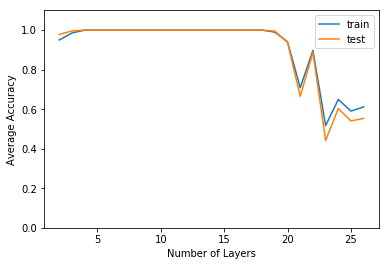

In [36]:
fig, ax = plt.subplots()
layers = np.arange(2,max_layers+2,1)
ax.plot(layers, train_results_per_layer, label='train')
ax.plot(layers, test_results_per_layer/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

### 64 layers in the hidden layers

In [8]:
from Networks.ResNet import ResFCNet
import numpy as np

num_epochs = 100
num_features = 2
num_classes = 2
size_hidden = 64
max_layers = 25
train_results_per_layer = np.zeros(max_layers)
test_results_per_layer = np.zeros(max_layers)
basic_save_key = 'Vanishing_gradients_results//ResNet//ResNet'

for num_hidden_layers in range(1,max_layers+1):
    
    num_layers = num_hidden_layers + 1
    print('Number of layers: '+str(num_layers))
    layers = make_uniform_hidden_layer_list(num_layers, num_features, num_classes, size_hidden)
    train_results_per_epoch = np.zeros(num_epochs)
    test_results_per_epoch = np.zeros(num_epochs)
    for i in range(10):
        net = ResFCNet(num_layers=num_layers, layers=layers, bias=True)
        net.set_test_tracking(True)
        net.train(num_epochs, train_loader, test_loader, print_output=False)
        train_results_per_epoch += net.avg_correct_pred.numpy()
        test_results_per_epoch += net.test_results.numpy()
        
    train_results_per_epoch = train_results_per_epoch / 10
    test_results_per_epoch = test_results_per_epoch / 10
    train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_hidden_size_'+str(size_hidden)+'.csv'
    test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_hidden_size_'+str(size_hidden)+'.csv'
    
    np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
    np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')
    
    train_results_per_layer[num_hidden_layers-1] = train_results_per_epoch.max()
    print('Max training accuracy: '+str(train_results_per_epoch.max()))
    test_results_per_layer[num_hidden_layers-1] = test_results_per_epoch.max()
    print('Max test accuracy: '+str(test_results_per_epoch.max()/test_set_size))

train_save_key = basic_save_key+'_train_per_layer_hidden_size_'+str(size_hidden)+'.csv'
test_save_key = basic_save_key+'_test_per_layer_hidden_size_'+str(size_hidden)+'.csv'
np.savetxt(train_save_key, train_results_per_layer, delimiter=',')
np.savetxt(test_save_key, test_results_per_layer, delimiter=',')

Number of layers: 2
Max training accuracy: 0.9899999856948852
Max test accuracy: 1.0
Number of layers: 3
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 4
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 5
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 6
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 7
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 8
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 9
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 10
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 11
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 12
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 13
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 14
Max training accuracy: 1.0
Max test accuracy: 1.0
Number of layers: 15
Max training accuracy: 0.8531250059604645
Max tes

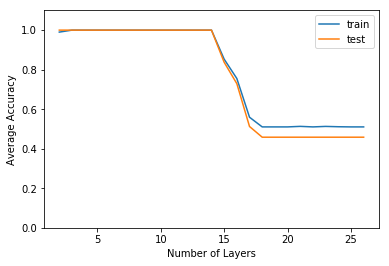

In [9]:
fig, ax = plt.subplots()
layers = np.arange(2,max_layers+2,1)
ax.plot(layers, train_results_per_layer, label='train')
ax.plot(layers, test_results_per_layer/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

## Anti Symmetric Weight Matrices

### 8 neurons in the hidden layers

In [5]:
from Networks.ResNet import ResAntiSymNet
import numpy as np
import timeit

num_epochs = 100
num_features = 2
num_classes = 2
size_hidden = 8
gamma = 0.3
h = 1

max_layers = 40
train_results_per_layer = np.zeros(max_layers)
test_results_per_layer = np.zeros(max_layers)
basic_save_key = 'Vanishing_gradients_results//AntiSymNet//AntiSymNet'

for num_hidden_layers in range(1,max_layers+1):
    tic = timeit.default_timer()
    num_layers = num_hidden_layers + 1
    print('Number of layers: '+str(num_layers))
    train_results_per_epoch = np.zeros(num_epochs)
    test_results_per_epoch = np.zeros(num_epochs)
    for i in range(10):
        net = ResAntiSymNet(features=num_features, classes=num_classes, num_layers=num_layers, gamma=gamma, h=h, bias=True, hidden_size=size_hidden)
        net.set_test_tracking(True)
        net.train(num_epochs, train_loader, test_loader, print_output=False)
        train_results_per_epoch += net.avg_correct_pred.numpy()
        test_results_per_epoch += net.test_results.numpy()
        
    train_results_per_epoch = train_results_per_epoch / 10
    test_results_per_epoch = test_results_per_epoch / 10
    train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_hidden_size_'+str(size_hidden)+'.csv'
    test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_hidden_size_'+str(size_hidden)+'.csv'
    
    np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
    np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')
    
    train_results_per_layer[num_hidden_layers-1] = train_results_per_epoch.max()
    print('Max training accuracy: '+str(train_results_per_epoch.max()))
    test_results_per_layer[num_hidden_layers-1] = test_results_per_epoch.max()
    print('Max test accuracy: '+str(test_results_per_epoch.max()/test_set_size))
    
    toc = timeit.default_timer()
    print('Time elapsed: '+str(toc-tic))

train_save_key = basic_save_key+'_train_per_layer_hidden_size_'+str(size_hidden)+'.csv'
test_save_key = basic_save_key+'_test_per_layer_hidden_size_'+str(size_hidden)+'.csv'
np.savetxt(train_save_key, train_results_per_layer, delimiter=',')
np.savetxt(test_save_key, test_results_per_layer, delimiter=',')

Number of layers: 2
Max training accuracy: 0.9160416722297668
Max test accuracy: 0.8716666666666666
Time elapsed: 13.018898235000009
Number of layers: 3
Max training accuracy: 0.9522916555404664
Max test accuracy: 0.9216666666666666
Time elapsed: 15.944311303999996
Number of layers: 4
Max training accuracy: 0.99083331823349
Max test accuracy: 0.9816666666666667
Time elapsed: 20.374549816
Number of layers: 5
Max training accuracy: 0.9935416638851166
Max test accuracy: 0.985
Time elapsed: 23.557566027999997
Number of layers: 6
Max training accuracy: 0.979583328962326
Max test accuracy: 0.9700000000000001
Time elapsed: 27.69039342800002
Number of layers: 7
Max training accuracy: 0.9837499976158142
Max test accuracy: 0.9700000000000001
Time elapsed: 30.889983312999988
Number of layers: 8
Max training accuracy: 0.9702083349227906
Max test accuracy: 0.9525
Time elapsed: 34.713131145000006
Number of layers: 9
Max training accuracy: 0.9802083313465119
Max test accuracy: 0.9700000000000001
Time

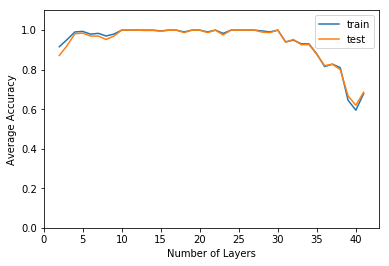

In [6]:
fig, ax = plt.subplots()
layers = np.arange(2,max_layers+2,1)
ax.plot(layers, train_results_per_layer, label='train')
ax.plot(layers, test_results_per_layer/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

### 64 neurons in the hidden layers

In [10]:
from Networks.ResNet import ResAntiSymNet
import numpy as np
import timeit

num_epochs = 100
num_features = 2
num_classes = 2
size_hidden = 64
gamma = 0.3
h = 1

max_layers = 30
train_results_per_layer = np.zeros(max_layers)
test_results_per_layer = np.zeros(max_layers)
basic_save_key = 'Vanishing_gradients_results//AntiSymNet//AntiSymNet'

for num_hidden_layers in range(1,max_layers+1):
    tic = timeit.default_timer()
    num_layers = num_hidden_layers + 1
    print('Number of layers: '+str(num_layers))
    train_results_per_epoch = np.zeros(num_epochs)
    test_results_per_epoch = np.zeros(num_epochs)
    for i in range(10):
        net = ResAntiSymNet(features=num_features, classes=num_classes, num_layers=num_layers, gamma=gamma, h=h, bias=True, hidden_size=size_hidden)
        net.set_test_tracking(True)
        net.train(num_epochs, train_loader, test_loader, print_output=False)
        train_results_per_epoch += net.avg_correct_pred.numpy()
        test_results_per_epoch += net.test_results.numpy()
        
    train_results_per_epoch = train_results_per_epoch / 10
    test_results_per_epoch = test_results_per_epoch / 10
    train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_hidden_size_'+str(size_hidden)+'.csv'
    test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_hidden_size_'+str(size_hidden)+'.csv'
    
    np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
    np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')
    
    train_results_per_layer[num_hidden_layers-1] = train_results_per_epoch.max()
    print('Max training accuracy: '+str(train_results_per_epoch.max()))
    test_results_per_layer[num_hidden_layers-1] = test_results_per_epoch.max()
    print('Max test accuracy: '+str(test_results_per_epoch.max()/test_set_size))
    
    toc = timeit.default_timer()
    print('Time elapsed: '+str(toc-tic))

train_save_key = basic_save_key+'_train_per_layer_hidden_size_'+str(size_hidden)+'.csv'
test_save_key = basic_save_key+'_test_per_layer_hidden_size_'+str(size_hidden)+'.csv'
np.savetxt(train_save_key, train_results_per_layer, delimiter=',')
np.savetxt(test_save_key, test_results_per_layer, delimiter=',')

Number of layers: 2
Max training accuracy: 0.9889583230018616
Max test accuracy: 1.0
Time elapsed: 13.183944596999936
Number of layers: 3
Max training accuracy: 0.9985416471958161
Max test accuracy: 1.0
Time elapsed: 23.70894621699972
Number of layers: 4
Max training accuracy: 1.0
Max test accuracy: 1.0
Time elapsed: 29.9346655610002
Number of layers: 5
Max training accuracy: 1.0
Max test accuracy: 1.0
Time elapsed: 38.3443947869996
Number of layers: 6
Max training accuracy: 1.0
Max test accuracy: 1.0
Time elapsed: 45.03545957100005
Number of layers: 7
Max training accuracy: 1.0
Max test accuracy: 1.0
Time elapsed: 54.98526304799998
Number of layers: 8
Max training accuracy: 1.0
Max test accuracy: 1.0
Time elapsed: 70.26083398400033
Number of layers: 9
Max training accuracy: 1.0
Max test accuracy: 1.0
Time elapsed: 69.74918650699965
Number of layers: 10
Max training accuracy: 1.0
Max test accuracy: 1.0
Time elapsed: 78.09523912299983
Number of layers: 11
Max training accuracy: 1.0
Max 

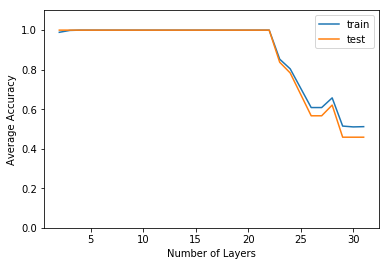

In [11]:
fig, ax = plt.subplots()
layers = np.arange(2,max_layers+2,1)
ax.plot(layers, train_results_per_layer, label='train')
ax.plot(layers, test_results_per_layer/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

## FC MSA Net

### 8 Neurons in the hidden layers

In [8]:
from Networks.ResNet import FCMSANet
import numpy as np

num_epochs = 100
num_features = 2
num_classes = 2
size_hidden = 8
max_layers = 35
train_results_per_layer = np.zeros(max_layers)
test_results_per_layer = np.zeros(max_layers)
basic_save_key = 'Vanishing_gradients_results//FCMSANet//FCMSANet'

for num_hidden_layers in range(1,max_layers+1):
    
    num_layers = num_hidden_layers + 1
    print('Number of layers: '+str(num_layers))
    layers = make_uniform_hidden_layer_list(num_layers, num_features, num_classes, size_hidden)
    train_results_per_epoch = np.zeros(num_epochs)
    test_results_per_epoch = np.zeros(num_epochs)
    for i in range(10):
        net = FCMSANet(num_fc=num_layers, sizes_fc=layers, bias=False, batchnorm=True)
        net.set_test_tracking(True)
        net.train_msa(num_epochs, train_loader, test_loader, print_output=False)
        train_results_per_epoch += net.avg_correct_pred.numpy()
        test_results_per_epoch += net.test_results.numpy()
        
    train_results_per_epoch = train_results_per_epoch / 10
    test_results_per_epoch = test_results_per_epoch / 10
    train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_hidden_size_'+str(size_hidden)+'.csv'
    test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_hidden_size_'+str(size_hidden)+'.csv'
    
    np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
    np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')
    
    train_results_per_layer[num_hidden_layers-1] = train_results_per_epoch.max()
    print('Max training accuracy: '+str(train_results_per_epoch.max()))
    test_results_per_layer[num_hidden_layers-1] = test_results_per_epoch.max()
    print('Max test accuracy: '+str(test_results_per_epoch.max()/test_set_size))

train_save_key = basic_save_key+'_train_per_layer_hidden_size_'+str(size_hidden)+'.csv'
test_save_key = basic_save_key+'_test_per_layer_hidden_size_'+str(size_hidden)+'.csv'
np.savetxt(train_save_key, train_results_per_layer, delimiter=',')
np.savetxt(test_save_key, test_results_per_layer, delimiter=',')

Number of layers: 2
Max training accuracy: 0.823333328962326
Max test accuracy: 0.84
Number of layers: 3
Max training accuracy: 0.9158333361148834
Max test accuracy: 0.925
Number of layers: 4
Max training accuracy: 0.9477083325386048
Max test accuracy: 0.9566666666666667
Number of layers: 5
Max training accuracy: 0.9468750059604645
Max test accuracy: 0.9658333333333334
Number of layers: 6
Max training accuracy: 0.9524999976158142
Max test accuracy: 0.9516666666666667
Number of layers: 7
Max training accuracy: 0.9545833349227906
Max test accuracy: 0.9708333333333333
Number of layers: 8
Max training accuracy: 0.9512499988079071
Max test accuracy: 0.9816666666666667
Number of layers: 9
Max training accuracy: 0.9418749928474426
Max test accuracy: 0.9450000000000001
Number of layers: 10
Max training accuracy: 0.9491666674613952
Max test accuracy: 0.965
Number of layers: 11
Max training accuracy: 0.9335416674613952
Max test accuracy: 0.95
Number of layers: 12
Max training accuracy: 0.9475000

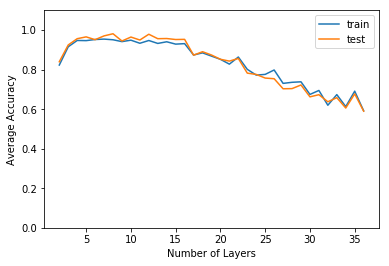

In [9]:
fig, ax = plt.subplots()
layers = np.arange(2,max_layers+2,1)
ax.plot(layers, train_results_per_layer, label='train')
ax.plot(layers, test_results_per_layer/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

### 64 neurons in the hidden layers

In [10]:
from Networks.ResNet import FCMSANet
import numpy as np

num_epochs = 100
num_features = 2
num_classes = 2
size_hidden = 64
max_layers = 50
train_results_per_layer = np.zeros(max_layers)
test_results_per_layer = np.zeros(max_layers)
basic_save_key = 'Vanishing_gradients_results//FCMSANet//FCMSANet'

for num_hidden_layers in range(1,max_layers+1):
    
    num_layers = num_hidden_layers + 1
    print('Number of layers: '+str(num_layers))
    layers = make_uniform_hidden_layer_list(num_layers, num_features, num_classes, size_hidden)
    train_results_per_epoch = np.zeros(num_epochs)
    test_results_per_epoch = np.zeros(num_epochs)
    for i in range(10):
        net = FCMSANet(num_fc=num_layers, sizes_fc=layers, bias=False, batchnorm=True)
        net.set_test_tracking(True)
        net.train_msa(num_epochs, train_loader, test_loader, print_output=False)
        train_results_per_epoch += net.avg_correct_pred.numpy()
        test_results_per_epoch += net.test_results.numpy()
        
    train_results_per_epoch = train_results_per_epoch / 10
    test_results_per_epoch = test_results_per_epoch / 10
    train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_hidden_size_'+str(size_hidden)+'.csv'
    test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_hidden_size_'+str(size_hidden)+'.csv'
    
    np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
    np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')
    
    train_results_per_layer[num_hidden_layers-1] = train_results_per_epoch.max()
    print('Max training accuracy: '+str(train_results_per_epoch.max()))
    test_results_per_layer[num_hidden_layers-1] = test_results_per_epoch.max()
    print('Max test accuracy: '+str(test_results_per_epoch.max()/test_set_size))

train_save_key = basic_save_key+'_train_per_layer_hidden_size_'+str(size_hidden)+'.csv'
test_save_key = basic_save_key+'_test_per_layer_hidden_size_'+str(size_hidden)+'.csv'
np.savetxt(train_save_key, train_results_per_layer, delimiter=',')
np.savetxt(test_save_key, test_results_per_layer, delimiter=',')

Number of layers: 2
Max training accuracy: 0.8620833337306977
Max test accuracy: 0.895
Number of layers: 3
Max training accuracy: 0.9856249988079071
Max test accuracy: 0.9966666666666666
Number of layers: 4
Max training accuracy: 0.9906249940395355
Max test accuracy: 0.9991666666666668
Number of layers: 5
Max training accuracy: 0.9920833289623261
Max test accuracy: 1.0
Number of layers: 6
Max training accuracy: 0.9927083253860474
Max test accuracy: 1.0
Number of layers: 7
Max training accuracy: 0.9910416543483734
Max test accuracy: 1.0
Number of layers: 8
Max training accuracy: 0.9914583265781403
Max test accuracy: 1.0
Number of layers: 9
Max training accuracy: 0.9927083194255829
Max test accuracy: 1.0
Number of layers: 10
Max training accuracy: 0.9914583265781403
Max test accuracy: 1.0
Number of layers: 11
Max training accuracy: 0.992291659116745
Max test accuracy: 1.0
Number of layers: 12
Max training accuracy: 0.9924999952316285
Max test accuracy: 1.0
Number of layers: 13
Max traini

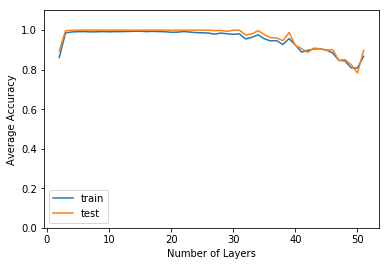

In [11]:
fig, ax = plt.subplots()
layers = np.arange(2,max_layers+2,1)
ax.plot(layers, train_results_per_layer, label='train')
ax.plot(layers, test_results_per_layer/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')